In [1]:
import requests
import pandas as pd
from pprint import pprint
import json
from Cleaning_Weekly_Schedule_Data import weekly_games_df
import time
import numpy as np

In [2]:
#pulling in DataFrame
weekly_games_df.head()

,Game ID,Game Reference Number,Game Number,Scheduled Time,Attendance,Weather,Sr_ID,Home Team Name,Home Team Alias,Home Team Id,...,Quarter 1 Points (Home),Quarter 1 Points (Away),Quarter 2 Points (Home),Quarter 2 Points (Away),Quarter 3 Points (Home),Quarter 3 Points (Away),Quarter 4 Points (Home),Quarter 4 Points (Away),Overtime Points (Home),Overtime Points (Away)
0,018556f9-1977-4a0b-8244-20cad15df9a4,58178,11,2020-09-13T20:05:00+00:00,0.0,"Partly Cloudy Temp: 83 F, Humidity: 56%, Wind:...",sr:match:21980371,Cincinnati Bengals,CIN,ad4ae08f-d808-42d5-a1e6-e9bc4e34d123,...,7.0,0.0,0.0,6.0,6.0,0.0,0.0,10.0,None,None
1,10339048-8c6b-43c7-ae7c-d68cf44417d3,58183,16,2020-09-15T02:20:00+00:00,0.0,"Mostly Clear Temp: 79 F, Humidity: 14%, Wind: ...",sr:match:21980381,Denver Broncos,DEN,ce92bd47-93d5-4fe9-ada4-0fc681e6caa0,...,7.0,0.0,0.0,7.0,0.0,0.0,7.0,9.0,None,None
2,213b8eda-43d8-4e62-9951-ed4c605fca0d,58175,8,2020-09-13T17:00:00+00:00,0.0,N/A (Indoors) Temp: Humidity: Wind:,sr:match:21980357,Minnesota Vikings,MIN,33405046-04ee-4058-a950-d606f8c30852,...,7.0,3.0,3.0,19.0,0.0,7.0,24.0,14.0,None,None
3,24734cde-bf1b-46e5-ad50-d61e47aeca26,58174,7,2020-09-13T17:00:00+00:00,14100.0,"Partly Cloudy Temp: 80 F, Humidity: 85%, Wind:...",sr:match:21980359,Jacksonville Jaguars,JAC,f7ddd7fa-0bae-4f90-bc8e-669e4d6cf2de,...,0.0,7.0,14.0,10.0,3.0,0.0,10.0,3.0,None,None
4,5a5b0a83-1765-4729-b914-73ff7d4c4c89,58172,5,2020-09-13T17:00:00+00:00,0.0,"Mostly Sunny Temp: 81 F, Humidity: 59%, Wind: ...",sr:match:21980367,Carolina Panthers,CAR,f14bf5cc-9a82-4a38-bc15-d39f75ed5314,...,9.0,7.0,6.0,10.0,0.0,10.0,15.0,7.0,None,None


In [3]:
#calling columns to have a quick way to reference the column names
weekly_games_df.columns

Index(['Game ID', 'Game Reference Number', 'Game Number', 'Scheduled Time',
       'Attendance', 'Weather', 'Sr_ID', 'Home Team Name', 'Home Team Alias',
       'Home Team Id', 'Away Team Name', 'Away Team Alias', 'Away Team Id',
       'Final Score (Home)', 'Final Score (Away)', 'Quarter 1 Points (Home)',
       'Quarter 1 Points (Away)', 'Quarter 2 Points (Home)',
       'Quarter 2 Points (Away)', 'Quarter 3 Points (Home)',
       'Quarter 3 Points (Away)', 'Quarter 4 Points (Home)',
       'Quarter 4 Points (Away)', 'Overtime Points (Home)',
       'Overtime Points (Away)'],
      dtype='object')

In [4]:
#create a new df to work with without affecting our original dataframe
close_games_df = weekly_games_df
#add a column named "Game Diff (Final)" that contains the difference in final scores
close_games_df['Game Diff (Final)'] = (weekly_games_df['Final Score (Home)'] - weekly_games_df['Final Score (Away)'])
#add a column to track the score at the beginning of the 4th quarter for the home team
close_games_df['Beg of the 4th Quarter Score (Home)'] = (weekly_games_df['Quarter 1 Points (Home)'] 
                                                         + weekly_games_df['Quarter 2 Points (Home)']
                                                         + weekly_games_df['Quarter 3 Points (Home)'])
#add a column to track the score at the beginning of the 4th quarter for the away team
close_games_df['Beg of the 4th Quarter Score (Away)'] = (weekly_games_df['Quarter 1 Points (Away)'] 
                                                         + weekly_games_df['Quarter 2 Points (Away)']
                                                         + weekly_games_df['Quarter 3 Points (Away)'])
#add a column to track the difference in scores at the beginning of the 4th quarter
close_games_df['Game Diff (4th Quarter)'] = (weekly_games_df['Beg of the 4th Quarter Score (Home)'] 
                                             - weekly_games_df['Beg of the 4th Quarter Score (Away)'])
#Figure out if the team that was down in the beginning of the 4th quarter won 


In [5]:
#show only games where the difference in final scores was 3 points or less
# close_games_df = close_games_df[(close_games_df['Game Diff (Final)'] > -4) 
#                                 & (close_games_df['Game Diff (Final)'] < 4)].reset_index()

close_games_df[['Game ID', 'Home Team Name', 'Home Team Alias', 'Home Team Id', 
               'Away Team Name', 'Away Team Alias', 'Away Team Id', 
                'Final Score (Home)','Final Score (Away)', 'Game Diff (Final)',
                'Beg of the 4th Quarter Score (Home)', 
                'Beg of the 4th Quarter Score (Away)',
                'Game Diff (4th Quarter)',
                'Quarter 4 Points (Home)', 'Quarter 4 Points (Away)', 
                'Overtime Points (Home)', 'Overtime Points (Away)']]

,Game ID,Home Team Name,Home Team Alias,Home Team Id,Away Team Name,Away Team Alias,Away Team Id,Final Score (Home),Final Score (Away),Game Diff (Final),Beg of the 4th Quarter Score (Home),Beg of the 4th Quarter Score (Away),Game Diff (4th Quarter),Quarter 4 Points (Home),Quarter 4 Points (Away),Overtime Points (Home),Overtime Points (Away)
0,018556f9-1977-4a0b-8244-20cad15df9a4,Cincinnati Bengals,CIN,ad4ae08f-d808-42d5-a1e6-e9bc4e34d123,Los Angeles Chargers,LAC,1f6dcffb-9823-43cd-9ff4-e7a8466749b5,13.0,16.0,-3.0,13.0,6.0,7.0,0.0,10.0,None,None
1,10339048-8c6b-43c7-ae7c-d68cf44417d3,Denver Broncos,DEN,ce92bd47-93d5-4fe9-ada4-0fc681e6caa0,Tennessee Titans,TEN,d26a1ca5-722d-4274-8f97-c92e49c96315,14.0,16.0,-2.0,7.0,7.0,0.0,7.0,9.0,None,None
2,213b8eda-43d8-4e62-9951-ed4c605fca0d,Minnesota Vikings,MIN,33405046-04ee-4058-a950-d606f8c30852,Green Bay Packers,GB,a20471b4-a8d9-40c7-95ad-90cc30e46932,34.0,43.0,-9.0,10.0,29.0,-19.0,24.0,14.0,None,None
3,24734cde-bf1b-46e5-ad50-d61e47aeca26,Jacksonville Jaguars,JAC,f7ddd7fa-0bae-4f90-bc8e-669e4d6cf2de,Indianapolis Colts,IND,82cf9565-6eb9-4f01-bdbd-5aa0d472fcd9,27.0,20.0,7.0,17.0,17.0,0.0,10.0,3.0,None,None
4,5a5b0a83-1765-4729-b914-73ff7d4c4c89,Carolina Panthers,CAR,f14bf5cc-9a82-4a38-bc15-d39f75ed5314,Las Vegas Raiders,LV,7d4fcc64-9cb5-4d1b-8e75-8a906d1e1576,30.0,34.0,-4.0,15.0,27.0,-12.0,15.0,7.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,7b9e1d03-4907-4a24-8f43-ef651804f3ff,Kansas City Chiefs,KC,6680d28d-d4d2-49f6-aace-5292d3ec02c2,Cleveland Browns,CLE,d5a2eb42-8065-4174-ab79-0a6fa820e35e,22.0,17.0,5.0,22.0,10.0,12.0,0.0,7.0,None,None
3,c4032aec-ffc3-4275-994d-19aba97c1bc4,New Orleans Saints,NO,0d855753-ea21-4953-89f9-0e20aff9eb73,Tampa Bay Buccaneers,TB,4254d319-1bc7-4f81-b4ab-b5e6f3402b69,20.0,30.0,-10.0,20.0,20.0,0.0,0.0,10.0,None,None
0,8328733a-b4b9-47b9-bd2e-b3a38a87442e,Green Bay Packers,GB,a20471b4-a8d9-40c7-95ad-90cc30e46932,Tampa Bay Buccaneers,TB,4254d319-1bc7-4f81-b4ab-b5e6f3402b69,26.0,31.0,-5.0,23.0,28.0,-5.0,3.0,3.0,None,None
1,cef80d79-ce26-434f-9f44-b560b66fa83e,Kansas City Chiefs,KC,6680d28d-d4d2-49f6-aace-5292d3ec02c2,Buffalo Bills,BUF,768c92aa-75ff-4a43-bcc0-f2798c2e1724,38.0,24.0,14.0,31.0,15.0,16.0,7.0,9.0,None,None


In [6]:
len(close_games_df)

271

In [38]:
#Figure out if the team that was down in the beginning of the 4th quarter won 

#empty list to store T/F booleans
down_team_won = []
#loop through each close game 
for i in range(0, len(close_games_df['Game Diff (Final)'])):
    #if the final difference is negative and the 4th quarter difference is positive it means the 
    #team that was down at the beginning of the fourth won
    if (list(close_games_df['Game Diff (4th Quarter)'])[i]) < 0 and (list(close_games_df['Game Diff (Final)'])[i])>0:
        down_team_won.append(True)
    #if the final difference is positive and the 4th quarter difference is negative it means the 
    #team that was down at the beginning of the fourth won
    elif (list(close_games_df['Game Diff (4th Quarter)'])[i]) > 0 and (list(close_games_df['Game Diff (Final)'])[i])<0:
        down_team_won.append(True)
    #otherwise the team that was up at the beginning of the fourth won
    else:
        down_team_won.append(False)

        #adding column to dataframe
close_games_df['Down Team Won?'] = down_team_won


In [87]:
close_clean = close_games_df[['Game ID', 'Home Team Name', 'Home Team Alias', 'Home Team Id', 
               'Away Team Name', 'Away Team Alias', 'Away Team Id', 
                'Final Score (Home)','Final Score (Away)', 'Game Diff (Final)',
                'Beg of the 4th Quarter Score (Home)', 
                'Beg of the 4th Quarter Score (Away)',
                'Game Diff (4th Quarter)',
                'Quarter 4 Points (Home)', 'Quarter 4 Points (Away)', 
                'Overtime Points (Home)', 'Overtime Points (Away)', 
               'Down Team Won?']]

In [100]:
#close_clean = close_clean[abs(close_clean['Game Diff (4th Quarter)'])>7]
lead_blows = close_clean[close_clean['Down Team Won?']==True]
lead_blows

,Game ID,Home Team Name,Home Team Alias,Home Team Id,Away Team Name,Away Team Alias,Away Team Id,Final Score (Home),Final Score (Away),Game Diff (Final),Beg of the 4th Quarter Score (Home),Beg of the 4th Quarter Score (Away),Game Diff (4th Quarter),Quarter 4 Points (Home),Quarter 4 Points (Away),Overtime Points (Home),Overtime Points (Away),Down Team Won?
0,018556f9-1977-4a0b-8244-20cad15df9a4,Cincinnati Bengals,CIN,ad4ae08f-d808-42d5-a1e6-e9bc4e34d123,Los Angeles Chargers,LAC,1f6dcffb-9823-43cd-9ff4-e7a8466749b5,13.0,16.0,-3.0,13.0,6.0,7.0,0.0,10.0,None,None,True
10,d24d9aab-74ce-44b6-960b-7bf905a416c1,Washington Football Team,WAS,22052ff7-c065-42ee-bc8f-c4691c50e624,Philadelphia Eagles,PHI,386bdbf9-9eea-4869-bb9a-274b0bc66e80,27.0,17.0,10.0,14.0,17.0,-3.0,13.0,0.0,None,None,True
11,d8655663-9853-4425-96e2-b2d7f5cc23db,San Francisco 49ers,SF,f0e724b0-4cbf-495a-be47-013907608da9,Arizona Cardinals,ARI,de760528-1dc0-416a-a978-b510d20692ff,20.0,24.0,-4.0,13.0,10.0,3.0,7.0,14.0,None,None,True
14,ede37e68-ccac-46c9-9331-7d8a710e0cc2,Detroit Lions,DET,c5a59daa-53a7-4de0-851f-fb12be893e9e,Chicago Bears,CHI,7b112545-38e6-483c-a55c-96cf6ee49cb8,23.0,27.0,-4.0,23.0,6.0,17.0,0.0,21.0,None,None,True
11,a76ed880-ef6c-43a3-b2a2-f6eae7f072b2,Dallas Cowboys,DAL,e627eec7-bbae-4fa4-8e73-8e1d6bc5c060,Atlanta Falcons,ATL,e6aa13a4-0055-48a9-bc41-be28dc106929,40.0,39.0,1.0,24.0,29.0,-5.0,16.0,10.0,NaN,NaN,True
12,b228e3f1-2863-4061-b734-9e917f2c86db,Los Angeles Chargers,LAC,1f6dcffb-9823-43cd-9ff4-e7a8466749b5,Kansas City Chiefs,KC,6680d28d-d4d2-49f6-aace-5292d3ec02c2,20.0,23.0,-3.0,17.0,9.0,8.0,3.0,11.0,0,3,True
1,4029503c-28ec-44cf-8ec6-007b10cab602,Pittsburgh Steelers,PIT,cb2f9f1f-ac67-424e-9e72-1475cb0ed398,Houston Texans,HOU,82d2d380-3834-4938-835f-aec541e5ece7,28.0,21.0,7.0,20.0,21.0,-1.0,8.0,0.0,NaN,NaN,True
6,7b1a38c8-e231-4911-8272-063b63ecff86,Atlanta Falcons,ATL,e6aa13a4-0055-48a9-bc41-be28dc106929,Chicago Bears,CHI,7b112545-38e6-483c-a55c-96cf6ee49cb8,26.0,30.0,-4.0,26.0,10.0,16.0,0.0,20.0,NaN,NaN,True
8,9a6f3984-ba9b-4112-82fc-6104faeb3634,Cleveland Browns,CLE,d5a2eb42-8065-4174-ab79-0a6fa820e35e,Washington Football Team,WAS,22052ff7-c065-42ee-bc8f-c4691c50e624,34.0,20.0,14.0,17.0,20.0,-3.0,17.0,0.0,NaN,NaN,True
10,ace45788-54c8-4ed9-abda-a4e8c1099305,Arizona Cardinals,ARI,de760528-1dc0-416a-a978-b510d20692ff,Detroit Lions,DET,c5a59daa-53a7-4de0-851f-fb12be893e9e,23.0,26.0,-3.0,23.0,20.0,3.0,0.0,6.0,NaN,NaN,True


In [101]:
leads = pd.DataFrame({'Team Name': [],
             'Team Alias': []})
for row in range(len(lead_blows)):
    if list(lead_blows['Game Diff (4th Quarter)'])[row]>0:
        #home team blew the lead
        leads = leads.append({'Team Name': list(lead_blows['Home Team Name'])[row],
                             'Team Alias': list(lead_blows['Home Team Alias'])[row]}, ignore_index = True)
    elif list(lead_blows['Game Diff (4th Quarter)'])[row]<0:
        #away team blew the lead
        leads = leads.append({'Team Name': list(lead_blows['Away Team Name'])[row],
                             'Team Alias': list(lead_blows['Away Team Alias'])[row]}, ignore_index = True)        

In [102]:
leads

,Team Name,Team Alias
0,Cincinnati Bengals,CIN
1,Philadelphia Eagles,PHI
2,San Francisco 49ers,SF
3,Detroit Lions,DET
4,Atlanta Falcons,ATL
5,Los Angeles Chargers,LAC
6,Houston Texans,HOU
7,Atlanta Falcons,ATL
8,Washington Football Team,WAS
9,Arizona Cardinals,ARI


In [131]:
graph_data = leads.groupby('Team Name').count().reset_index().sort_values('Team Alias', ascending = False)
x_vals = list(graph_data['Team Name'])
y_vals = list(graph_data['Team Alias'])
graph_data

,Team Name,Team Alias
1,Atlanta Falcons,4
12,Los Angeles Chargers,4
18,San Francisco 49ers,3
5,Cincinnati Bengals,3
0,Arizona Cardinals,2
9,Houston Texans,2
14,New York Giants,2
13,New England Patriots,1
20,Tampa Bay Buccaneers,1
19,Seattle Seahawks,1


In [132]:
import matplotlib.pyplot as plt

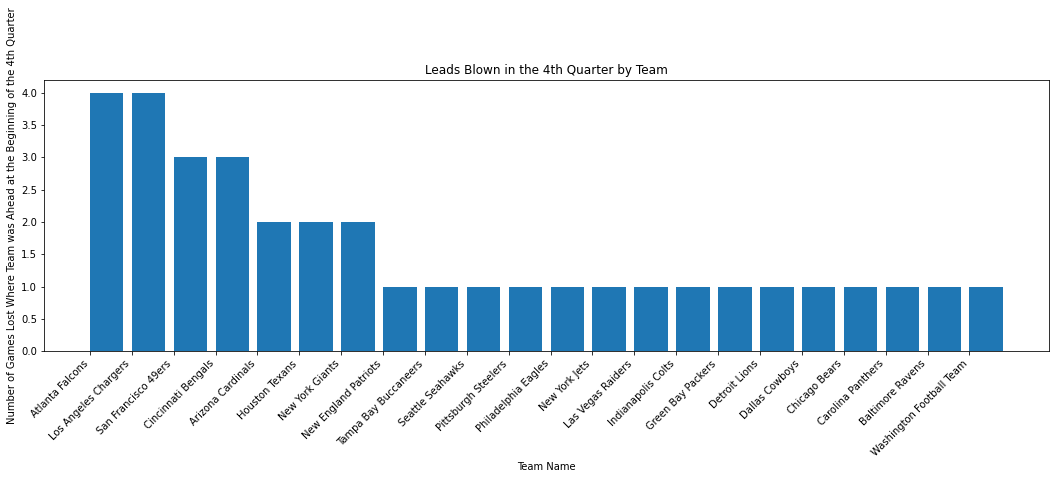

In [133]:
fig, ax = plt.subplots(figsize = (18,5));
ax.bar(x_vals, y_vals, align = 'edge');
ax.set(title = 'Leads Blown in the 4th Quarter by Team', 
      xlabel = 'Team Name', 
      ylabel = 'Number of Games Lost Where Team was Ahead at the Beginning of the 4th Quarter');
plt.xticks(rotation = 45, ha = 'right');

In [135]:
plt.savefig('Teams Who Lost After Leading into the 4th Quarter.png')

<Figure size 432x288 with 0 Axes>

In [134]:
#len(close_clean)
#print(list(close_clean['Game ID']))